# Homework 7: Flow, Bifurcation and Linearization

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

## Problem 1: Flow and Bifurcation

You are studying energy potential diagrams and come across the following equation:
$\frac{dx}{dt} = rx+x^3-x^5$.

In [1]:
function energy_equation(𝑥, 𝑟)
    ∂𝑥∂𝑡 = 𝑟*𝑥 + 𝑥^3 - 𝑥^5
end;

### 1.1 First task
- Let **r** = [-2.0, -0.2, 2.0] and use the code cell below to plot the 'Flow on a Line' and 'Bifurcation' diagrams.

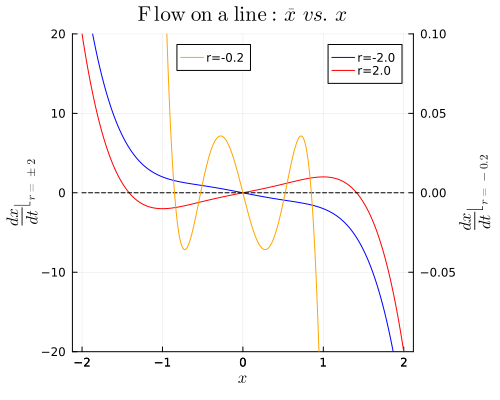

In [2]:
using Plots, LaTeXStrings

flow_dict = Dict()
colors = [:blue, :orange, :red]
𝑥 = range(-2, 2, 500)
flow_plot = plot(xlabel=L"x", size=(500,400), ylims=(-20, 20),
                 ylabel=L"\frac{dx}{dt}\lfloor_{r=\pm 2}",
                 title=L"$\mathrm{Flow\,\,on\,\,a\,\,line:}\bar{x}\,\,\,vs.\,x$")
for (idx, 𝑟) in enumerate([-2.0, -0.2, 2.0])
    flow_dict[string(𝑟)] = energy_equation.(𝑥, 𝑟)
    if (𝑟 > -0.5) && (𝑟 < 0.5)
        plot!(twinx(), 𝑥, flow_dict[string(𝑟)], c=colors[idx],
              ylabel=L"\frac{dx}{dt}\lfloor_{r=-0.2}", leg=:top,
              label="r=$(𝑟)", ylims=(-0.1, 0.1), right_margin=15Plots.mm)
    else
        plot!(flow_plot, 𝑥, flow_dict[string(𝑟)], c=colors[idx], label="r=$(𝑟)")
    end 
end

plot!(flow_plot, [𝑥[1], 𝑥[end]], [0, 0], ls=:dash, c=:black, label=false, right_margin=20Plots.mm)

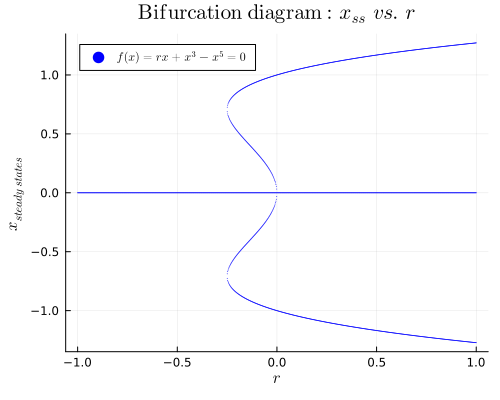

In [3]:
using Polynomials, Plots

p_all = zeros(0)
roots_all = zeros(0)

for r = range(-1, 1, 1000)
    poly = Polynomial([0, r, 0, 1, 0, -1])
    raices = roots(poly)
    reales = real.(raices)[imag.(raices).== 0.0]
    append!(roots_all, reales)
    append!(p_all, fill(r, length(reales)))
end

plot(size=(500,400), title=L"$\mathrm{Bifurcation\,\,diagram:}x_{ss}\,\,vs.\,r$")
scatter!(p_all, roots_all, label=L"f(x)=rx + x^3 - x^5=0", 
       markerstrokewidth=0, markersize=0.5, c=:blue, leg=:topleft)
plot!(xlabel=L"r", ylabel=L"x_{steady\,\,states}")

How many steadystates are there and what are their approximate values? Describe the stability of each steady state.

- $r=-2.0$: $x_{ss}=$ 0.0 (stable).
- $r=-0.2$: $x_{ss}=$ -0.851 (stable); -0.526 (unstable); 0.0 (stable); 0.526 (unstable); 0.851 (stable).
- $r=2.0$: $x_{ss}=$ -1.414 (stable); 0.0 (unstable); 1.414 (stable);  

### 1.2 Second task
- To ensure we understand what the flow diagram means in terms of the dynamic changes in the value of x over time, please use an ODE solver to simulate the differential equation with $x_0 = 0.8$. Plot the value of x versus time in the space below. For the simulation time and time step size, choose appropriate numbers such that the plot is smooth and the figure clearly shows the approach to steadystate.

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\OMEN LAPTOP\.julia\packages\SciMLBase\0IYdl\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\OMEN LAPTOP\.julia\packages\SciMLBase\0IYdl\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\OMEN LAPTOP\.julia\packages\SciMLBase\0IYdl\src\retcodes.jl:360


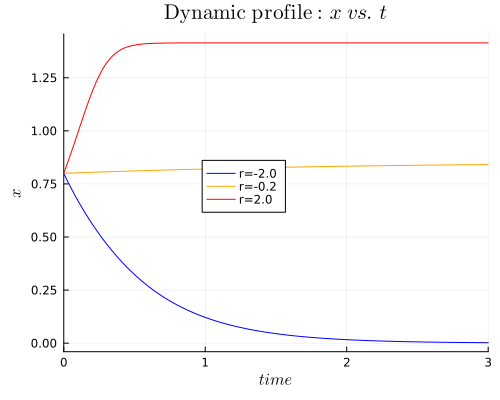

In [15]:
using DifferentialEquations

function energy_model!(dxdt, x, r, t)
    dxdt[1] = r*x[1] + 1*x[1]^3 - x[1]^5
end;

x0 = [0.8]
tspan = (0.0, 3)
prob = ODEProblem(energy_model!, x0, tspan, -0.2);
colors = [:blue, :orange, :red]
ode_plot = plot(size=(500,400), title=L"$\mathrm{Dynamic\,\,profile:}x\,\,vs.\,t$")
for (idx, 𝑟) in enumerate([-2.0, -0.2, 2.0])
    sol = solve(remake(prob; p=𝑟), RadauIIA5(); verbose=false)
    plot!(ode_plot, sol, label="r=$(𝑟)", c=colors[idx])
end

plot!(xlabel=L"time", ylabel=L"x", leg=:inside)    

### 1.2 Third task
- Putting everything together, the goal here is to emphasize that flow on a line makes it easy to understand first order ODE's steadystate and the system behavior near steadystate. But we also see here how quickly the number of steadystates and their stability changes with our choice of parameter values.

In [16]:
function energy_model!(dxdt, x, r, t)
    dxdt[1] = r*x[1] + x[1]^3 - x[1]^5
end;

function steady_state_error(sol, tspan; ts=0.25)
    last_t = tspan[end]
    lapse = tspan[end] - tspan[1]
    midway_t = tspan[1] + lapse*(1 - ts)
    midway_sol = sol(midway_t)[1]
    100*abs((sol(last_t)[1] - midway_sol)/sol(last_t)[1])
end;

t_all = zeros(0)
x_all = zeros(0)
r_all = zeros(0)
xss_all = zeros(0)

tol = -1E-8
dt = 5
x0 = [0.2]
tspan = (0.0, dt)
r = -2
prob = ODEProblem(energy_model!, x0, tspan, r);

r_range = range(-0.5, 0.5, 100)
r_array = collect(r_range)
append!(r_array, reverse(r_array))
for r = r_array
    prob = remake(prob; u0=x0, tspan=tspan, p=r)
    sol = solve(prob, RadauIIA5())
    append!(t_all, sol.t)
    append!(x_all, convert(Array, sol))
    append!(r_all, fill(r, length(sol.t)))

    sse = steady_state_error(sol, tspan)
    
    while (sse >= 1) && (abs(sol.u[end][1]) > abs(tol))
        x0 = sol.u[end]
        tspan = (tspan[end], tspan[end]*(1.5))
        sol = solve(remake(prob; u0=x0, tspan=tspan), RadauIIA5(), verbose=false)
        append!(t_all, sol.t)
        append!(x_all, convert(Array, sol))
        append!(r_all, fill(r, length(sol.t)))
        sse = steady_state_error(sol, tspan)
    end

    x_ss = sol.u[end]
    append!(xss_all, x_ss)
    x0 = x_ss + [tol]
    tspan = (tspan[end]+tol, tspan[end]+dt)
end;

In [17]:
using Ranges

N = Int64(length(r_array)/2)
forward = [cgrad(:rainbow, N)[c] for c in range(N)]
backward = [cgrad(:rainbow, N, rev=true)[c] for c in range(N)]
Cgrad = append!(forward, backward)

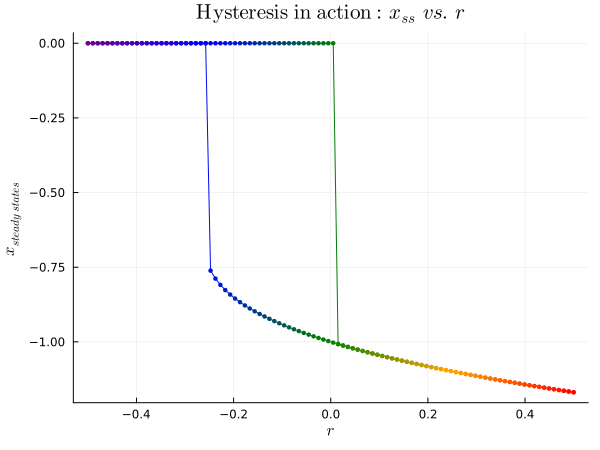

In [18]:
plot(size=(600,450), xlabel=L"r", ylabel=L"x_{steady\,\,states}",
     title=L"$\mathrm{Hysteresis\,\,in\,\,action:} x_{ss}\,\,vs.\,r$")
scatter!(r_array, xss_all, c=Cgrad, markerstrokewidth=0, markersize=2.5, label=false)
plot!(r_array, xss_all, c=Cgrad, label=false)

In [19]:
inflection = findall(r_all .== 0.5)
N_forward = inflection[Int64(round(length(inflection)/2))]
N_backward = length(r_all) - N_forward

forward = [cgrad(:darktest, N_forward)[c] for c in range(N_forward)]
backward = [cgrad(:darktest, N_backward, rev=true)[c] for c in range(N_backward)]
Cpallete = append!(forward, backward)

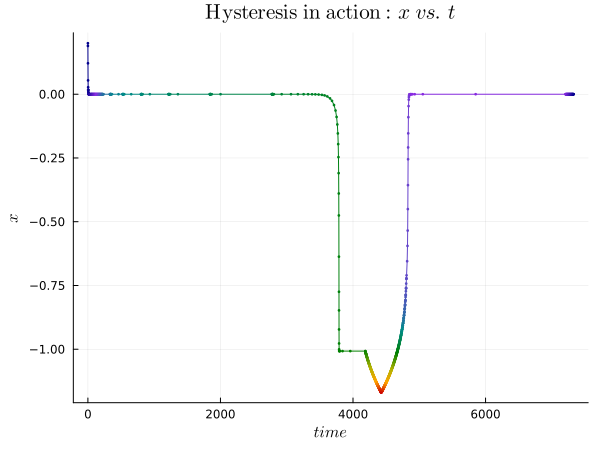

In [20]:
plot(size=(600,450), xlabel=L"time", ylabel=L"x",
     title=L"$\mathrm{Hysteresis\,\,in\,\,action:} x\,\,vs.\,t$")
scatter!(t_all, x_all, c=Cpallete, markerstrokewidth=0, markersize=1.5, label=false)
plot!(t_all, x_all, c=Cpallete, label=false)

Below, comment on how uncertainty in the value of r may impact your system. 
<div class="alert alert-block alert-info">
<b>Comments: A parameter in the equation (as is the case of r above) may have an impact on the number os steady states and their stability. Also, varying a parameter (forward and backward) can generate hyteresis behavior in the system.</b>
</div>

***